In [1]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import sklearn
import matplotlib.pyplot as plt

In [2]:
# linear regression methodology
class LR:
    
    def fit(self, X_train, y_train):
        # create vector of ones...
        ones = np.ones(shape=len(X_train))[..., None]
        #...and add to feature matrix
        X = np.concatenate((ones, X_train), 1)
        #calculate coefficients using closed-form solution
        self.coeffs = inv(X.transpose().dot(X)).dot(X.transpose()).dot(y_train)
        
    def predict(self, X_test):
        ones = np.ones(shape=len(X_test))[..., None]
        X_test = np.concatenate((ones, X_test), 1)
        y_hat = X_test.dot(self.coeffs)
        return y_hat


In [3]:
# sklear linear regression example
from sklearn.linear_model import LinearRegression

data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")

bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_test = bordeaux_df.loc[1980:].copy()

X_train = bordeaux_train[["age"]]
X_test = bordeaux_test[["age"]]
y_train = bordeaux_train["price"]

model = LinearRegression()
model.fit(X=X_train, y=y_train)
model.predict(X=X_test)

array([13.5724999 , 12.41648163, 11.26046336, 10.1044451 ,  8.94842683,
        7.79240856,  6.6363903 ,  5.48037203,  4.32435376,  3.1683355 ,
        2.01231723,  0.85629897])

In [4]:
# our linear regression example on same data
model = LR()
model.fit(X_train, y_train)
model.predict(X_test)

array([13.5724999 , 12.41648163, 11.26046336, 10.1044451 ,  8.94842683,
        7.79240856,  6.6363903 ,  5.48037203,  4.32435376,  3.1683355 ,
        2.01231723,  0.85629897])

In [5]:
# cross validation methodology
def k_fold(k, df):
    n = len(df)
    cut = int(n/k)
    folds = []
    start = 0
    end = cut
    for i in range(0, k):
        fold = df[start: end]
        folds.append(fold)
        start += int(n/k)
        end += int(n/k)
    return folds

def mse(actual, predicted):
    return -(((actual - predicted)**2).mean())

def cv(folds, response):
    test_errors = []
    for i in range(0, len(folds)):
        X_train = pd.DataFrame()
        Y_train = pd.Series(dtype=float)
        for j in range(0, len(folds)):
            if i == j:
                X_test = folds[j].drop([response], axis=1)
                Y_test = folds[j][response]
            if i != j:
                X_train = X_train.append(folds[j].drop([response], axis=1))
                Y_train = Y_train.append(folds[j][response])
    
        model = LR()
        model.fit(X_train, Y_train.transpose())
        Y_pred = pd.DataFrame()
        Y_pred = model.predict(X_test)
        error = mse(Y_test, Y_pred) 
        test_errors.append(error)
        rmse = np.sqrt(-sum(test_errors)/len(folds))
    return test_errors, rmse

In [6]:
# sklearn cross validation example
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

data_dir = "https://dlsun.github.io/pods/data/"
bordeaux_df = pd.read_csv(data_dir + "bordeaux.csv",
                          index_col="year")

bordeaux_train = bordeaux_df.loc[:1980].copy()
bordeaux_train["log(price)"] = np.log(bordeaux_train["price"])
bordeaux_train.drop(["price"], axis=1, inplace=True)

model = LinearRegression()
scores = cross_val_score(model, 
                         X=bordeaux_train[["win", "summer"]],
                         y=bordeaux_train["log(price)"],
                         scoring="neg_mean_squared_error",
                         cv=2)

print(scores)
print(np.sqrt(-scores).mean())

[-0.29898833 -0.27833086]
0.5371844859149082


In [7]:
# our cross validation on same data
bordeaux_train2 = bordeaux_train[["win", "summer", "log(price)"]]
folds = k_fold(2, bordeaux_train2)
errs, rmse = cv(folds, "log(price)")
print(errs)
print(rmse)


[-0.32615365834155635, -0.28766838705142556]
0.5539955078306059


In [8]:
# Standardizing the Dataframe

def standardize(df): 
    #standardize only quantitative variables
    df_st = ((df.select_dtypes(float) - df.select_dtypes(float).mean()) / df.select_dtypes(float).std()) 

    #join the standardized quantites back with original df 
    df_st = df.select_dtypes(exclude=float).join(df_st)
    return df_st 

In [9]:
df = pd.read_csv("iowa_month_county_main.csv") 
df.set_index(["County", "Month-Year"], inplace=True)

halfway = len(df)//2

df_train = df.iloc[:halfway].copy()
df_test = df.iloc[halfway:].copy()

In [10]:
df_train.head()

Pack  State Bottle Cost  State Bottle Retail  \
County Month-Year                                                      
Adair  01-2012     10.411765           7.212647            10.852941   
       02-2012     10.394737           9.180263            13.802105   
       03-2012     12.307692           7.256923            10.931923   
       04-2012     12.142857           7.265238            10.922857   
       05-2012     10.238095           9.279286            13.990476   

                   Bottles Sold Per Capita  Alcohol Expense Per Capita  \
County Month-Year                                                        
Adair  01-2012                    0.000914                    0.009719   
       02-2012                    0.000927                    0.011195   
       03-2012                    0.000917                    0.009475   
       04-2012                    0.000969                    0.010872   
       05-2012                    0.001011                    0.013036   

                   Volume Sold (Gallons) Per Capita  Consolidated_Brandy  \
County Month-Year                                                          
Adair  01-2012                             0.000267             0.000000   
       02-2012                             0.000250             0.052632   
       03-2012                             0.000196             0.076923   
       04-2012                             0.000235             0.071429   
       05-2012                             0.000260             0.023810   

                   Consolidated_Gin  Consolidated_Rum  Consolidated_Schnapps  \
County Month-Year                                                              
Adair  01-2012             0.029412          0.088235               0.176471   
       02-2012             0.105263          0.052632               0.105263   
       03-2012             0.076923          0.153846               0.153846   
       04-2012             0.166667          0.047619               0.047619   
       05-2012             0.047619          0.000000               0.047619   

                   Consolidated_Tequila  Consolidated_Vodka  \
County Month-Year                                             
Adair  01-2012                  0.00000            0.235294   
       02-2012                  0.00000            0.184211   
       03-2012                  0.00000            0.153846   
       04-2012                  0.00000            0.214286   
       05-2012                  0.02381            0.285714   

                   Consolidated_Whiskey  Population  Income Per Capita  
County Month-Year                                                       
Adair  01-2012                 0.323529        7468              42093  
       02-2012                 0.394737        7468              42093  
       03-2012                 0.346154        7468              42093  
       04-2012                 0.309524        7468              42093  
       05-2012                 0.476190        7468              42093

In [11]:
y_train = df_train[["Volume Sold (Gallons) Per Capita"]]
x_train = df_train[["State Bottle Cost"]]
x_test = df_train[["State Bottle Cost"]]
model_sk = LinearRegression()
model.fit(x_train, y_train)
model.predict(y_train)[0:5]

array([[0.0001966],
       [0.0001966],
       [0.0001966],
       [0.0001966],
       [0.0001966]])

# Testing Models

test errors: [-0.965716681247778, -1.0177505840751349, -0.9654639247161485, -1.1707939223824249, -0.929564275192455]
     
rmse: 1.0049168510492736
K-Folds =  2
Minimum RMSE =  1.0037217239396046


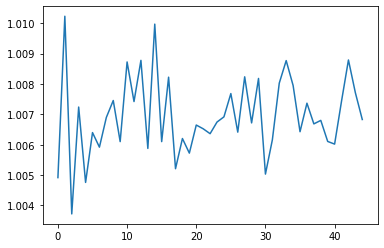

In [12]:
# 1 predictor: State Bottle Cost
df_test = df[["State Bottle Cost","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
SBC = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.965911882904529, -1.0180068311104775, -0.9652820102954729, -1.1710227729082208, -0.9293181387139001]
     
rmse: 1.0049419521477447
K-Folds =  2
Minimum RMSE =  1.0037580609633043


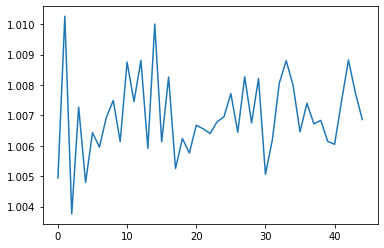

In [13]:
# 1 predictor: State Bottle Retail
df_test = df[["State Bottle Retail","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
SBR = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.1532111485997984, -0.5828117905877774, -0.13386775538722756, -0.11199478435870916, -0.10105250122832367]
     
rmse: 0.46538972488911623
K-Folds =  27
Minimum RMSE =  0.4534213466673819


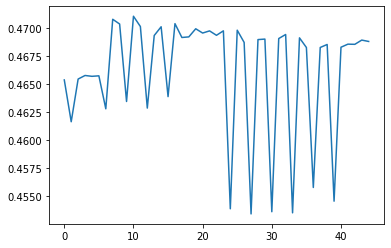

In [14]:
# 1 predictor: Bottles Sold Per Capita
df_test = df[["Bottles Sold Per Capita","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
BSPC = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.9402652751972587, -1.2902381286233797, -0.8507876228891286, -1.0597884378553637, -0.8366571106387771]
     
rmse: 0.9977711736870241
K-Folds =  30
Minimum RMSE =  0.9844822076764221


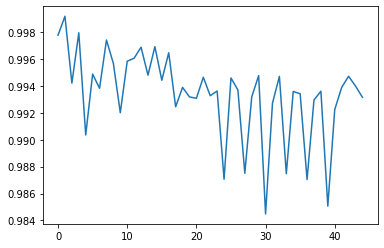

In [15]:
# 1 predictor: Pack
df_test = df[["Pack","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
PCK = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.13468322496424348, -0.19294824672271463, -0.07064414991364953, -0.08470285026547862, -0.08580153461450941]
     
rmse: 0.3372773358767516
K-Folds =  2
Minimum RMSE =  0.33694034773331816


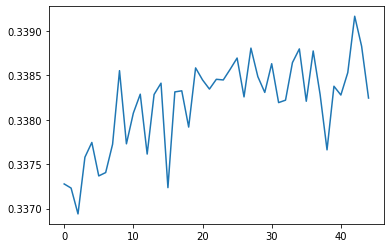

In [16]:
# 1 predictor: Alcohol Expense Per Capita
df_test = df[["Alcohol Expense Per Capita","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
AEPC = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.8811549388058023, -0.8898072085261692, -0.7538741809742702, -1.7525408648384015, -0.7084337738505174]
     
rmse: 0.9985800886253601
K-Folds =  38
Minimum RMSE =  0.9471059028328841


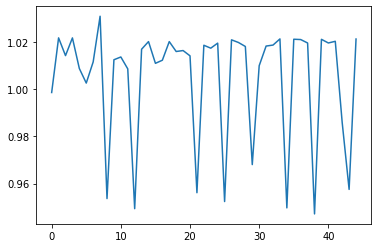

In [17]:
# 1 predictor: Population
df_test = df[["Population","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
PPLN = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.9547656982034679, -1.084887749996942, -0.9307411163233443, -1.1729577895977776, -0.9187732404608955]
     
rmse: 1.006193380477374
K-Folds =  0
Minimum RMSE =  1.006193380477374


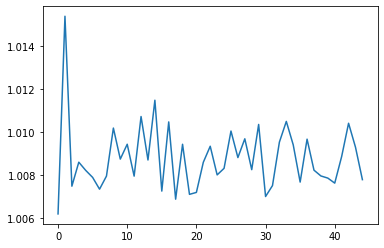

In [18]:
# 1 predictor: Income Per Capita
df_test = df[["Income Per Capita","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
IPC = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.9629951993331423, -0.9794195993498143, -0.9315383647199776, -1.1144029128154345, -0.857402876428432]
     
rmse: 0.9844550728851774
K-Folds =  2
Minimum RMSE =  0.9836356577877657


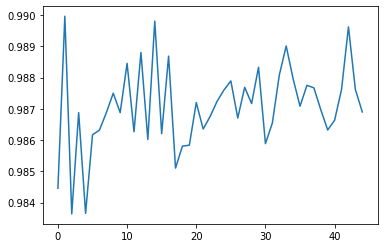

In [19]:
# 1 predictor: Alcohol Type
df_test = df[["Consolidated_Brandy","Consolidated_Gin","Consolidated_Rum",
              "Consolidated_Schnapps","Consolidated_Tequila","Consolidated_Vodka","Consolidated_Whiskey"
              ,"Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
ALC = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

In [20]:
df.head()

Pack  State Bottle Cost  State Bottle Retail  \
County Month-Year                                                      
Adair  01-2012     10.411765           7.212647            10.852941   
       02-2012     10.394737           9.180263            13.802105   
       03-2012     12.307692           7.256923            10.931923   
       04-2012     12.142857           7.265238            10.922857   
       05-2012     10.238095           9.279286            13.990476   

                   Bottles Sold Per Capita  Alcohol Expense Per Capita  \
County Month-Year                                                        
Adair  01-2012                    0.000914                    0.009719   
       02-2012                    0.000927                    0.011195   
       03-2012                    0.000917                    0.009475   
       04-2012                    0.000969                    0.010872   
       05-2012                    0.001011                    0.013036   

                   Volume Sold (Gallons) Per Capita  Consolidated_Brandy  \
County Month-Year                                                          
Adair  01-2012                             0.000267             0.000000   
       02-2012                             0.000250             0.052632   
       03-2012                             0.000196             0.076923   
       04-2012                             0.000235             0.071429   
       05-2012                             0.000260             0.023810   

                   Consolidated_Gin  Consolidated_Rum  Consolidated_Schnapps  \
County Month-Year                                                              
Adair  01-2012             0.029412          0.088235               0.176471   
       02-2012             0.105263          0.052632               0.105263   
       03-2012             0.076923          0.153846               0.153846   
       04-2012             0.166667          0.047619               0.047619   
       05-2012             0.047619          0.000000               0.047619   

                   Consolidated_Tequila  Consolidated_Vodka  \
County Month-Year                                             
Adair  01-2012                  0.00000            0.235294   
       02-2012                  0.00000            0.184211   
       03-2012                  0.00000            0.153846   
       04-2012                  0.00000            0.214286   
       05-2012                  0.02381            0.285714   

                   Consolidated_Whiskey  Population  Income Per Capita  
County Month-Year                                                       
Adair  01-2012                 0.323529        7468              42093  
       02-2012                 0.394737        7468              42093  
       03-2012                 0.346154        7468              42093  
       04-2012                 0.309524        7468              42093  
       05-2012                 0.476190        7468              42093

In [21]:
data = {"Predictors": ["State Bottle Cost", "State Bottle Retail","Bottles Sold Per Capita",
                       "Pack", "Alcohol Expense Per Capita","Population","Income Per Capita","Alcohol Type"],
       "RMSE": [SBC, SBR, BSPC,PCK,AEPC,PPLN,IPC,ALC],}
one_predictor = pd.DataFrame(data, columns = ["Predictors", "RMSE"])
one_predictor

,Predictors,RMSE
0,State Bottle Cost,1.004917
1,State Bottle Retail,1.004942
2,Bottles Sold Per Capita,0.465390
3,Pack,0.997771
4,Alcohol Expense Per Capita,0.337277
5,Population,0.998580
6,Income Per Capita,1.006193
7,Alcohol Type,0.984455


# Best individual predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita

test errors: [-0.11509833770018532, -0.2216694713439997, -0.06495323757600613, -0.07904958959377788, -0.07311297055727588]
     
rmse: 0.3328313707483851
K-Folds =  30
Minimum RMSE =  0.3280008919931845


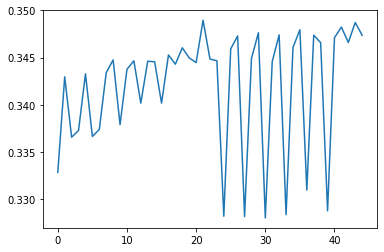

In [22]:
# 2 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
two_pr = out[1] 

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Next 4: State Bottle Cost, State Bottle Retail, Income Per Capita, Population equal weight 

test errors: [-0.10879356872897247, -0.20652268922085334, -0.06198884357339169, -0.07442765892689193, -0.07637206200503088]
     
rmse: 0.3249937914653572
K-Folds =  30
Minimum RMSE =  0.3218130057017322


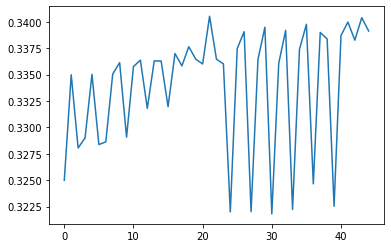

In [23]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, "State Bottle Cost"
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","State Bottle Cost",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
three_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.1089122809775263, -0.2066667144046591, -0.06199646464397562, -0.07448105219172522, -0.07630357655032742]
     
rmse: 0.32507232695762145
K-Folds =  30
Minimum RMSE =  0.3218952218664574


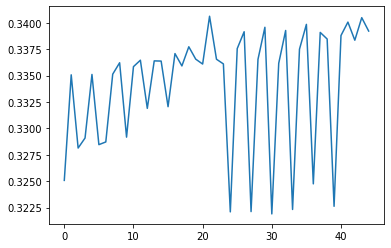

In [24]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, "State Bottle Retail"
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","State Bottle Retail",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
three_pr2 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.11529065747753571, -0.22146359991785178, -0.06490147684816104, -0.0790757936403506, -0.07319556383565741]
     
rmse: 0.3328444356511181
K-Folds =  30
Minimum RMSE =  0.32829575439415154


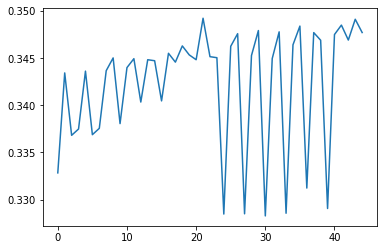

In [25]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Income Per Capita",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.11518453028863929, -0.2239333863673788, -0.06507912369773661, -0.07924234076781206, -0.07311599978306131]
     
rmse: 0.33363314610650663
K-Folds =  30
Minimum RMSE =  0.32858900905387234


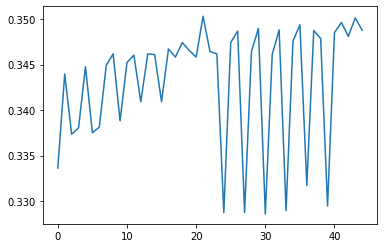

In [26]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Population
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Population",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.11202977357161574, -0.2203555770603934, -0.06218798876933332, -0.07766456484269385, -0.07089413444536813]
     
rmse: 0.32958520558101645
K-Folds =  33
Minimum RMSE =  0.32459911020620036


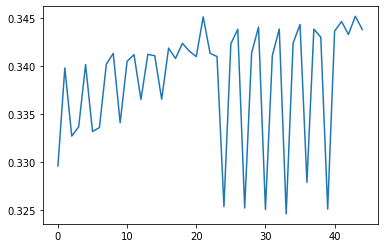

In [27]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Alcohol Type
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Consolidated_Brandy","Consolidated_Gin",
              "Consolidated_Rum","Consolidated_Schnapps","Consolidated_Tequila",
              "Consolidated_Vodka","Consolidated_Whiskey", "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.0961233206643123, -0.16654138502141044, -0.06556420326593741, -0.07619350069400117, -0.06476600642194509]
     
rmse: 0.3063293704715911
K-Folds =  27
Minimum RMSE =  0.30141250280663434


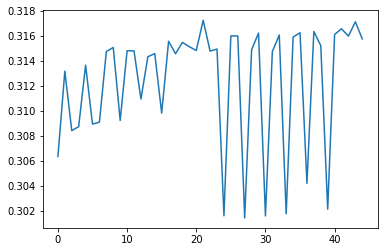

In [28]:
# 3 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
three_pr3 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Best 3 Predictor Model:  Bottles Sold Per Capita * Alcohol Expense Per Capita * Pack

test errors: [-0.09471190216199663, -0.1676153521086821, -0.06440260527321835, -0.0822206523816739, -0.06403715606138516]
     
rmse: 0.3075671204751757
K-Folds =  27
Minimum RMSE =  0.3019959733748303


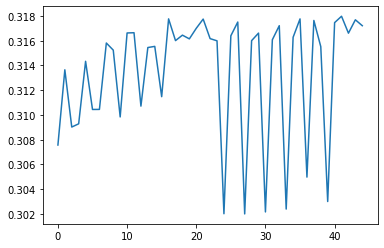

In [29]:
# 4 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, Population
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita", "Pack","Population",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08901188009080693, -0.15043159124781944, -0.060405760539963514, -0.07141701769664051, -0.06669395950326094]
     
rmse: 0.2959595273271301
K-Folds =  30
Minimum RMSE =  0.29333919249113577


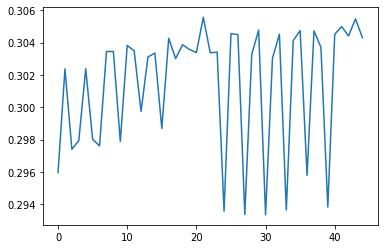

In [30]:
# 4 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Retail
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita", "Pack","State Bottle Retail",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
four_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.09614717200690252, -0.16654672246623126, -0.06556145136657818, -0.0766042878340654, -0.06480542316384276]
     
rmse: 0.30648492845085223
K-Folds =  27
Minimum RMSE =  0.3016176297544182


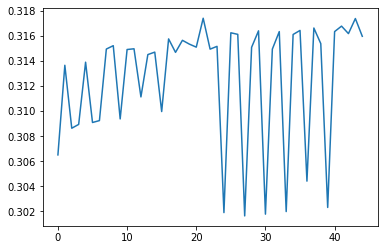

In [31]:
# 4 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, Income Per Capita
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", "Income Per Capita",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08893053447921008, -0.15041174213050024, -0.0604113114510344, -0.07140304341212529, -0.06673140226588188]
     
rmse: 0.2959351394271224
K-Folds =  30
Minimum RMSE =  0.29330082640395067


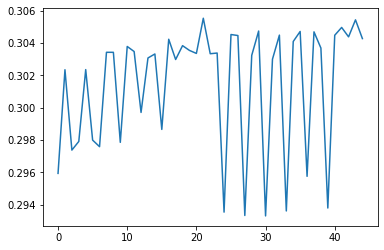

In [32]:
# 4 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Cost
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", "State Bottle Cost",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
four_pr2 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.09409725496833488, -0.16847894760246784, -0.0640314307225898, -0.0771304816198723, -0.06351742973543491]
     
rmse: 0.3056977411263288
K-Folds =  33
Minimum RMSE =  0.29997331469918187


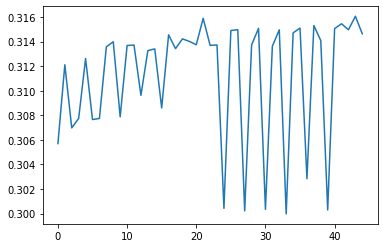

In [33]:
# 4 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, Alcohol Type
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", "Consolidated_Brandy",
              "Consolidated_Gin", "Consolidated_Rum","Consolidated_Schnapps","Consolidated_Tequila",
              "Consolidated_Vodka","Consolidated_Whiskey", "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Best 4 Predictor Model:  Bottles Sold Per Capita * Alcohol Expense Per Capita * Pack * State Bottle Cost

test errors: [-0.08877734904795793, -0.15068246633424306, -0.0607304095192721, -0.07137725943127961, -0.06683158173614896]
     
rmse: 0.29610777297089036
K-Folds =  30
Minimum RMSE =  0.29351394192011465


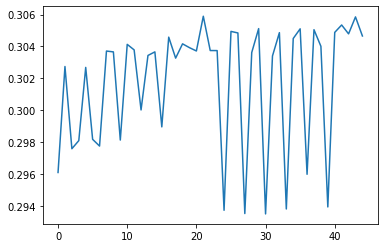

In [34]:
# 5 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Cost, State Bottle Retail
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack",
              "State Bottle Retail","State Bottle Cost",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
five_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.0890190880839801, -0.14990482163419983, -0.06022101247068385, -0.07107352294014328, -0.06772153154713698]
     
rmse: 0.29595269104238403
K-Folds =  27
Minimum RMSE =  0.29337617800918786


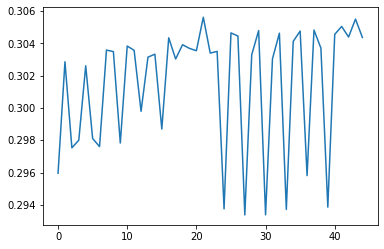

In [35]:
# 5 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Cost, Income Per capita
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", 
              "State Bottle Cost","Income Per Capita",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
five_pr2 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08870737557503605, -0.1533167976198501, -0.06033552136813968, -0.07286496743870595, -0.06599325979091894]
     
rmse: 0.2970582171200288
K-Folds =  33
Minimum RMSE =  0.2934920888623239


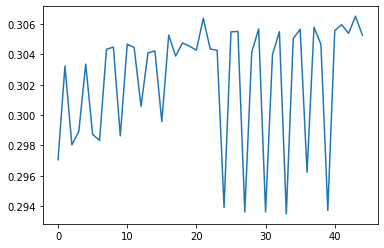

In [36]:
# 5 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Cost, Alcohol Type
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", 
              "State Bottle Cost","Consolidated_Brandy","Consolidated_Gin", "Consolidated_Rum",
              "Consolidated_Schnapps","Consolidated_Tequila","Consolidated_Vodka","Consolidated_Whiskey",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08678506576540745, -0.15041844332501797, -0.05849275660080782, -0.08043563107832041, -0.06635788254056064]
     
rmse: 0.2974860599457105
K-Folds =  30
Minimum RMSE =  0.29385713440285344


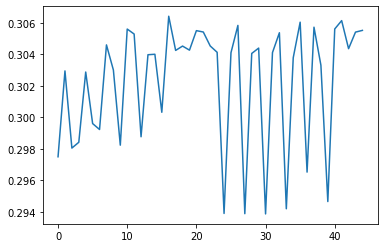

In [37]:
# 5 predictors: Bottles Sold Per Capita, Alcohol Expense Per Capita, Pack, State Bottle Cost, Population
df_test = df[["Bottles Sold Per Capita","Alcohol Expense Per Capita","Pack", 
              "State Bottle Cost","Population",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Best 5 Predictor Model:  Bottles Sold Per Capita * Alcohol Expense Per Capita * Income Per Capita * State Bottle Cost * Pack

test errors: [-0.08874017543676868, -0.15015726881009056, -0.06055169829292586, -0.07095665531291474, -0.06789194159633445]
     
rmse: 0.2960735514864623
K-Folds =  27
Minimum RMSE =  0.2935390783378102


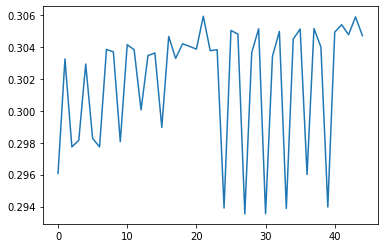

In [38]:
# 6 predictors: State Bottle Cost, State Bottle Retail, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita

df_test = df[["State Bottle Cost","State Bottle Retail","Pack","Bottles Sold Per Capita",
              "Alcohol Expense Per Capita","Income Per Capita","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
six_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08686782679146371, -0.1501020302001844, -0.05846549699426751, -0.08065992658218847, -0.06719813211115669]
     
rmse: 0.2977560789234237
K-Folds =  27
Minimum RMSE =  0.29394926351246337


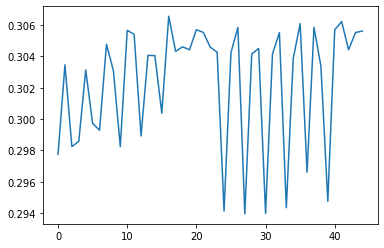

In [39]:
# 6 predictors: State Bottle Cost, Population, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita

df_test = df[["State Bottle Cost","Income Per Capita","Pack","Bottles Sold Per Capita",
              "Alcohol Expense Per Capita","Population","Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08874042875804973, -0.15279684181467842, -0.060030174348338995, -0.07233595325330561, -0.06689175097539964]
     
rmse: 0.29691586321709806
K-Folds =  33
Minimum RMSE =  0.2934797945674502


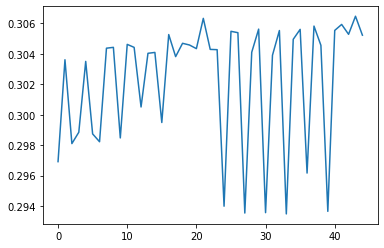

In [40]:
# 6 predictors: State Bottle Cost, Alcohol Type, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita

df_test = df[["State Bottle Cost","Income Per Capita","Pack","Bottles Sold Per Capita",
              "Alcohol Expense Per Capita","Consolidated_Brandy","Consolidated_Gin", "Consolidated_Rum",
              "Consolidated_Schnapps","Consolidated_Tequila","Consolidated_Vodka","Consolidated_Whiskey"
              ,"Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
six_pr2 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Best 6 Predictor Model:  Bottles Sold Per Capita * Alcohol Expense Per Capita * Income Per Capita * State Bottle Cost * Pack * State Bottle Retail

test errors: [-0.08881588745950829, -0.15272726820746624, -0.06034497275960759, -0.07227620551978572, -0.06721433909934045]
     
rmse: 0.29711232658565623
K-Folds =  33
Minimum RMSE =  0.29372433523508973


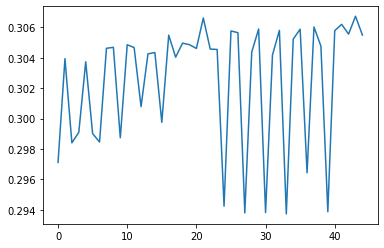

In [41]:
# 7 predictors: State Bottle Cost, State Bottle Retail, Alcohol Type, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita

df_test = df[["State Bottle Cost","State Bottle Retail","Pack","Bottles Sold Per Capita",
              "Alcohol Expense Per Capita","Income Per Capita","Consolidated_Brandy","Consolidated_Gin", "Consolidated_Rum",
              "Consolidated_Schnapps","Consolidated_Tequila","Consolidated_Vodka","Consolidated_Whiskey"
              ,"Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
seven_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

test errors: [-0.08671994331132094, -0.15028531316275365, -0.05882986961470365, -0.0804975952740483, -0.06732143930995241]
     
rmse: 0.2978772098273982
K-Folds =  27
Minimum RMSE =  0.2941186759868316


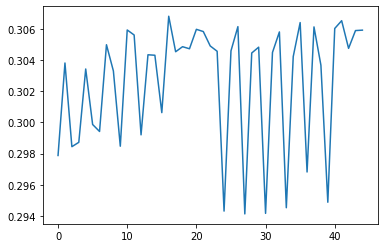

In [42]:
# 7 predictors: State Bottle Cost, State Bottle Retail, Population, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita

df_test = df[["State Bottle Cost","State Bottle Retail","Pack","Bottles Sold Per Capita",
              "Alcohol Expense Per Capita","Income Per Capita","Population",
              "Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

#  Best 7 Predictor Model:  Bottles Sold Per Capita * Alcohol Expense Per Capita * Income Per Capita * State Bottle Cost * Pack * State Bottle Retail * Alcohol Type

test errors: [-0.08698787582388236, -0.1533754758225358, -0.058787780673650564, -0.08118852310435215, -0.06686594821338296]
     
rmse: 0.2990670839921384
K-Folds =  33
Minimum RMSE =  0.2945187939227042


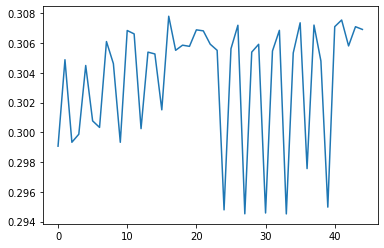

In [43]:
# 8 predictors: State Bottle Cost, State Bottle Retail, Alcohol Type, Pack,
#             Bottles Sold Per Capita, Alcohol Expense Per Capita, Income Per Capita, Population

df_test = df[["State Bottle Cost","State Bottle Retail","Pack","Bottles Sold Per Capita","Population",
              "Alcohol Expense Per Capita","Income Per Capita","Consolidated_Brandy","Consolidated_Gin", "Consolidated_Rum",
              "Consolidated_Schnapps","Consolidated_Tequila","Consolidated_Vodka","Consolidated_Whiskey"
              ,"Volume Sold (Gallons) Per Capita"]]
df_test = standardize(df_test)
response = "Volume Sold (Gallons) Per Capita"
folds = k_fold(5,df_test)
out = cv(folds, response)
print("test errors:", out[0])
print("     ")
print("rmse:", out[1])
eight_pr1 = out[1]

test_errs = []
for i in range(5,50):
    folds = k_fold(i, df_test)
    out = cv(folds, response)
    test_errs.append(out[1])
plt.plot(test_errs)
print("K-Folds = ", test_errs.index(min(test_errs)))
print("Minimum RMSE = ", min(test_errs))

# Best Models 

In [44]:
data = {"Predictors": ["State Bottle Cost", "State Bottle Retail","Bottles Sold Per Capita",
                       "Pack", "Alcohol Expense Per Capita","Population","Income Per Capita", "Alcohol Type"],
       "RMSE": [SBC, SBR, BSPC,PCK,AEPC,PPLN,IPC,ALC],}
one_predictor = pd.DataFrame(data, columns = ["Predictors", "RMSE"])
one_predictor

,Predictors,RMSE
0,State Bottle Cost,1.004917
1,State Bottle Retail,1.004942
2,Bottles Sold Per Capita,0.465390
3,Pack,0.997771
4,Alcohol Expense Per Capita,0.337277
5,Population,0.998580
6,Income Per Capita,1.006193
7,Alcohol Type,0.984455


In [45]:
data = {"Test":["Test 1", "Test 2", "Test 3", "Test 4", "Test 5", "Test 6", "Test 7", "Test 8",
               "Test 9","Test 10", "Test 11","Test 12"],
       "RMSE": [two_pr, three_pr1, three_pr2, three_pr3, four_pr1, four_pr2, five_pr1, 
                five_pr2, six_pr1, six_pr2, seven_pr1, eight_pr1],
       "Predictors": ["BSPC*AEPC",
                      "BSPC*AEPC*SBC",
                      "BSPC*AEPC*SBR",
                      "BSPC*AEPC*PCK",
                      "BSPC*AEPC*PCK*SBR",
                      "BSPC*AEPC*PCK*SBC",
                      "BSPC*AEPC*PCK*SBC*SBR",
                      "BSPC*AEPC*PCK*SBC*IPC",
                      "BSPC*AEPC*PCK*SBC*IPC*SBR",
                      "BSPC*AEPC*PCK*SBC*IPC*ALC",
                      "BSPC*AEPC*PCK*SBC*IPC*SBR*ALC",
                      "BSPC*AEPC*PCK*SBC*IPC*SBR*ALC*PPLN"],}
models = pd.DataFrame(data, columns = ["Test", "RMSE", "Predictors"])
models

,Test,RMSE,Predictors
0,Test 1,0.332831,BSPC*AEPC
1,Test 2,0.324994,BSPC*AEPC*SBC
2,Test 3,0.325072,BSPC*AEPC*SBR
3,Test 4,0.306329,BSPC*AEPC*PCK
4,Test 5,0.295960,BSPC*AEPC*PCK*SBR
5,Test 6,0.295935,BSPC*AEPC*PCK*SBC
6,Test 7,0.296108,BSPC*AEPC*PCK*SBC*SBR
7,Test 8,0.295953,BSPC*AEPC*PCK*SBC*IPC
8,Test 9,0.296074,BSPC*AEPC*PCK*SBC*IPC*SBR
9,Test 10,0.296916,BSPC*AEPC*PCK*SBC*IPC*ALC


In [46]:
data = {"Predictor": ["BSPC","AEPC","SBC","PCK","PPLN","SBR","IPC","ALC"],
       "Mapping": ["Bottles Sold Per Capita", "Alcohol Expense Per Capita", "State Bottle Cost","Pack",
                  "Population", "State Bottle Retail", "Income Per Capita","Alcohol Type"],}
mapping = pd.DataFrame(data, columns = ["Predictor", "Mapping"])
mapping

,Predictor,Mapping
0,BSPC,Bottles Sold Per Capita
1,AEPC,Alcohol Expense Per Capita
2,SBC,State Bottle Cost
3,PCK,Pack
4,PPLN,Population
5,SBR,State Bottle Retail
6,IPC,Income Per Capita
7,ALC,Alcohol Type
